### Exploration Phase

In [2]:
import cv2
import numpy as np
from imutils import perspective
from imutils import contours
import scipy
import imutils
from skimage.io import imread, imshow
from skimage.color import rgb2hsv
import matplotlib.pyplot as plt

In [3]:
image = cv2.imread("C:\\Users\\g654674\\OneDrive - General Mills\\Work_OneDrive\\Fruit Pieces\\Chocolate pieces\\All Wonka Photos\\Tote1_Case1_B_04.jpg")
# (h, w, d) = image.shape
# print("width={}, height={}, depth={}".format(w, h, d))
hsv = rgb2hsv(image)

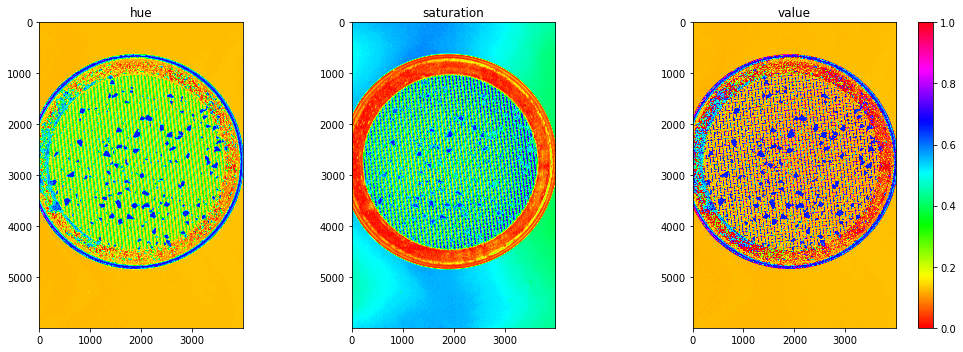

In [4]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(hsv[:,:,0],cmap='hsv')
ax[0].set_title('hue')
ax[1].imshow(hsv[:,:,1],cmap='hsv')
ax[1].set_title('saturation')
ax[2].imshow(hsv[:,:,2],cmap='hsv')
ax[2].set_title('value')
fig.colorbar(imshow(hsv[:,:,0],cmap='hsv')) 
fig.tight_layout()

In [5]:
#refer to hue channel (in the colorbar)
lower_mask = hsv[:,:,0] > 0.6 
#refer to hue channel (in the colorbar)
upper_mask = hsv[:,:,0] < 0.7
#refer to transparency channel (in the colorbar)
saturation_mask = hsv[:,:,1] > 0.4

value_mask = hsv[:,:,2] > 0.5
 
mask = upper_mask*lower_mask*saturation_mask
red = hsv[:,:,0]*mask
green = hsv[:,:,1]*mask
blue = hsv[:,:,2]*mask

bags_masked = np.dstack((red,green,blue))
# imshow(bags_masked)

In [7]:
from PIL import Image
im = Image.fromarray((bags_masked * 255).astype(np.uint8))

In [11]:
cimg = np.array(im)
gray = cv2.cvtColor(cimg, cv2.COLOR_BGR2GRAY)

#Blurring done to get a meaningful count of images - noise reduction
# blurred = cv2.blur(gray,(9,9))
blurred = cv2.GaussianBlur(gray,(35,35),0)
#you need to threshold image (convert it into a black and white image in order to draw edges)
ret, thresh = cv2.threshold(blurred, 25, 255, cv2.THRESH_BINARY)

cv2.namedWindow("thresh", cv2.WINDOW_NORMAL)
cv2.imshow("thresh", thresh)
cv2.waitKey(0)

-1

In [7]:
dilated = cv2.dilate(thresh,(5,5),iterations = 15)
cv2.namedWindow("dilated", cv2.WINDOW_NORMAL)
cv2.imshow("dilated", dilated)
cv2.waitKey(0)

-1

In [16]:
## opening - Dilation followed by erosion
kernel = np.ones((7,7),dtype=np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel) #
cv2.namedWindow("opening", cv2.WINDOW_NORMAL)
cv2.imshow("opening", opening)
cv2.waitKey(0)

-1

In [13]:
# Erosion
kernel = np.ones((5,5),dtype=np.uint8)
eroded_img = cv2.erode(gray,kernel,iterations=1)
cv2.namedWindow("eroded_img", cv2.WINDOW_NORMAL)
cv2.imshow('eroded_img',eroded_img)
cv2.waitKey(0)

-1

In [8]:
edged = cv2.Canny(dilated, 125, 175)
# cv2.namedWindow("edged", cv2.WINDOW_NORMAL)
# cv2.imshow("edged", edged)
# cv2.waitKey(0)

### Contour area (Default)

In [82]:
cnts = cv2.findContours(edged, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
cnts = imutils.grab_contours(cnts)
output = image.copy()
piece_count = 0
rel_piece_count = 0

# loop over the contours
attr =[]
for c in cnts:
    piece_count += 1
    area = cv2.contourArea(c) 
    x,y,w,h = cv2.boundingRect(c)      
    if area >= 5000:        
    # if piece_count ==  2000 :        
        rel_piece_count += 1        
        attr.append((rel_piece_count,int(area)))
        cv2.drawContours(output, [c], -1, (20, 200, 0), 5)        
        cv2.putText(output, str(rel_piece_count), (x,y - 2), cv2.FONT_HERSHEY_SIMPLEX, 3, (15,15,15), 15)

cv2.putText(output,f"{rel_piece_count}",(10, 120),cv2.FONT_HERSHEY_SIMPLEX, 4, (15,15,15),11)
cv2.namedWindow("output", cv2.WINDOW_NORMAL)
cv2.imshow("output",output)
cv2.waitKey(0)

-1

In [43]:
cv2.imwrite("C:\\Users\\g654674\\OneDrive - General Mills\\Work_OneDrive\\Fruit Pieces\\Chocolate pieces\\with_less_sharpness_exact_area_filtering.png", output)

True

In [410]:
import pandas as pd
df = pd.DataFrame({'attr':attr})
df[['piece','area']] = pd.DataFrame(df['attr'].tolist(), index=df.index)
# df[['piece', 'radius', 'area']] = pd.DataFrame(df['attr'].tolist(), index=df.index)
df.loc[:, df.columns != 'attr'].to_clipboard()

### Bounding rectangle example

In [75]:
# find contours (i.e., outlines) of the foreground objects in the thresholded image
cnts = cv2.findContours(edged, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
output = image.copy()
piece_count = 0
rel_piece_count = 0

# loop over the contours
attr =[]
for c in cnts:
    piece_count += 1        
    x,y,w,h = cv2.boundingRect(c)
    area = int(w) * int(h)    
    if area >= 8000:    
        rel_piece_count += 1        
        attr.append((rel_piece_count,x,y,w,h,int(area)))        
        cv2.rectangle(output,(x,y),(x+w,y+h),(20,200,0),5)        
        cv2.putText(output, str(rel_piece_count), (x,y - 2), cv2.FONT_HERSHEY_SIMPLEX, 3, (15,15,15), 15)

cv2.putText(output,f"{rel_piece_count}",(10, 120),cv2.FONT_HERSHEY_SIMPLEX, 4, (15,15,15),11)
# cv2.namedWindow("output", cv2.WINDOW_NORMAL)
# cv2.imshow("output",output)
cv2.imwrite("C:\\Users\\g654674\\OneDrive - General Mills\\Work_OneDrive\\Fruit Pieces\\Chocolate pieces\\with_less_sharpness_rectanlge.png", output)
# cv2.waitKey(0)

True

In [73]:
import pandas as pd
df = pd.DataFrame({'attr':attr})
df[['piece', 'x', 'y', 'w', 'h', 'area']] = pd.DataFrame(df['attr'].tolist(), index=df.index)
# df[['piece', 'radius', 'area']] = pd.DataFrame(df['attr'].tolist(), index=df.index)
df.loc[:, df.columns != 'attr'].to_clipboard()

### Minimum Bounding Rectangle

In [9]:
from scipy.spatial import distance as dist
def midpoint(ptA, ptB):
   return ((ptA[0] + ptB[0]) * 0.5, (ptA[1] + ptB[1]) * 0.5)

In [70]:
# find contours (i.e., outlines) of the foreground objects in the thresholded image
cnts = cv2.findContours(edged, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
(cnts, _) = contours.sort_contours(cnts)
output = image.copy()
piece_count = 0
rel_piece_count = 0
# pixelsPerMetric = None

#We got this number using piece 17 when every piece was counted. (width of the piece 17 was taken as 1 inch)
#For every 1 inch, there are 167.21 pixels in the image
pixelsPerMetric = 167.21617744704008

# loop over the contours
attr =[]
for c in cnts:
    piece_count += 1        
    x,y,w,h = cv2.boundingRect(c)     
    rect = cv2.minAreaRect(c)    
    box = cv2.boxPoints(rect)    
    box = np.array(box, dtype="int")
    box = perspective.order_points(box)
    # if piece_count == 17:                
    
    # unpack the ordered bounding box
    (tl, tr, br, bl) = box
    
    # compute the midpoint between the top-left and top-right coordinates, followed by
    # the midpoint between bottom-left and bottom-right coordinates        
    (tltrX, tltrY) = midpoint(tl, tr)
    (blbrX, blbrY) = midpoint(bl, br)
    
    # compute the midpoint between the top-left and top-right points,
    # followed by the midpoint between the top-righ and bottom-right
    (tlblX, tlblY) = midpoint(tl, bl)
    (trbrX, trbrY) = midpoint(tr, br)
    
    # compute the Euclidean distance between the midpoints
    dA = dist.euclidean((tltrX, tltrY), (blbrX, blbrY)) #Height in pixels
    dB = dist.euclidean((tlblX, tlblY), (trbrX, trbrY)) #Width in pixels
    
    # if the pixels per metric has not been initialized, then
    # compute it as the ratio of pixels to supplied metric
    # (in this case, inches)
    # if pixelsPerMetric is None:
    #     pixelsPerMetric = dB / 1            
    
    # compute the size of the object
    dimA = dA / pixelsPerMetric #Height
    dimB = dB / pixelsPerMetric #Width
    
    if dB > 80:
    # if piece_count == 173:
        rel_piece_count += 1
        
        cv2.drawContours(output, [box.astype("int")], -1, (0, 255, 0), 3)
        for (x, y) in box:
            cv2.circle(output, (int(x), int(y)), 5, (0, 0, 255), -1)
    
         # draw the midpoints on the image
        # cv2.circle(output, (int(tltrX), int(tltrY)), 5, (255, 0, 0), 3)
        # cv2.circle(output, (int(blbrX), int(blbrY)), 5, (255, 0, 0), 3)
        # cv2.circle(output, (int(tlblX), int(tlblY)), 5, (255, 0, 0), 3)
        # cv2.circle(output, (int(trbrX), int(trbrY)), 5, (255, 0, 0), 3)
        
        # # draw lines between the midpoints
        # cv2.line(output, (int(tltrX), int(tltrY)), (int(blbrX), int(blbrY)),(25, 0, 255), 3)
        # cv2.line(output, (int(tlblX), int(tlblY)), (int(trbrX), int(trbrY)),(25, 0, 255), 3)
        
        # draw the object sizes on the image
        # cv2.putText(output, "{:.1f}".format(dimA), (int(tltrX - 15), int(tltrY - 10)), cv2.FONT_HERSHEY_SIMPLEX, 3 , (0,0,0), 5)
        # cv2.putText(output, "{:.1f}".format(dimB), (int(trbrX + 10), int(trbrY)), cv2.FONT_HERSHEY_SIMPLEX, 3 , (0,0,0), 5)
        cv2.putText(output, str(rel_piece_count), (int(tlblX - 120), int(tlblY - 20)), cv2.FONT_HERSHEY_SIMPLEX, 3 , (0,0,0), 10)        
        attr.append((rel_piece_count, dB, dA, dimB, dimA))

cv2.putText(output,f"{rel_piece_count}",(10, 120),cv2.FONT_HERSHEY_SIMPLEX, 4, (15,15,15),11)
# cv2.namedWindow("output", cv2.WINDOW_NORMAL)
# cv2.imshow("output",output)
cv2.imwrite("C:\\Users\\g654674\\OneDrive - General Mills\\Work_OneDrive\\Fruit Pieces\\Chocolate pieces\\min_enclose_rect_width_greater_80_pix.png", output)
# cv2.waitKey(0)

True

In [71]:
import pandas as pd
df = pd.DataFrame({'attr':attr})
df[['piece','width_pixels', 'height_pixels', 'width_inch', 'height_inch']] = pd.DataFrame(df['attr'].tolist(), index=df.index)
df.loc[:, df.columns != 'attr'].to_clipboard()

 ### Circle example

In [78]:
# find contours (i.e., outlines) of the foreground objects in the thresholded image
cnts = cv2.findContours(edged, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
output = image.copy()
piece_count = 0
rel_piece_count = 0

# loop over the contours
attr =[]
for c in cnts:
    piece_count += 1    
    
    (x,y),radius = cv2.minEnclosingCircle(c)
    center = (int(x),int(y))
    radius = int(radius)    
    
    z,b,w,h = cv2.boundingRect(c)
    area = 3.14 * radius
    if int(area) >= 150:
    # if piece_count == 166:
        rel_piece_count += 1    
        attr.append((rel_piece_count,radius,int(area)))        
        cv2.circle(output,center,radius,(20,200,0),5)
        cv2.putText(output, str(rel_piece_count), (z,b - 2), cv2.FONT_HERSHEY_SIMPLEX, 3, (15,15,15), 15)

cv2.putText(output,f"{rel_piece_count}",(10, 120),cv2.FONT_HERSHEY_SIMPLEX, 4, (15,15,15),11)
cv2.namedWindow("output", cv2.WINDOW_NORMAL)
cv2.imshow("output",output)
cv2.waitKey(0)

-1

In [81]:
cv2.imwrite("C:\\Users\\g654674\\OneDrive - General Mills\\Work_OneDrive\\Fruit Pieces\\Chocolate pieces\\enclosing circle.png", output)

True

In [80]:
import pandas as pd
df = pd.DataFrame({'attr':attr})
df[['piece', 'radius', 'area']] = pd.DataFrame(df['attr'].tolist(), index=df.index)
df.loc[:, df.columns != 'attr'].to_clipboard()

### Other things

In [11]:
#HSV selector tool
import cv2
import sys
import numpy as np

def nothing(x):
    pass

# Create a window
cv2.namedWindow('image',cv2.WINDOW_NORMAL)

# create trackbars for color change
cv2.createTrackbar('HMin','image',0,179,nothing) # Hue is from 0-179 for Opencv
cv2.createTrackbar('SMin','image',0,255,nothing)
cv2.createTrackbar('VMin','image',0,255,nothing)
cv2.createTrackbar('HMax','image',0,179,nothing)
cv2.createTrackbar('SMax','image',0,255,nothing)
cv2.createTrackbar('VMax','image',0,255,nothing)

# Set default value for MAX HSV trackbars.
cv2.setTrackbarPos('HMax', 'image', 179)
cv2.setTrackbarPos('SMax', 'image', 255)
cv2.setTrackbarPos('VMax', 'image', 255)

# Initialize to check if HSV min/max value changes
hMin = sMin = vMin = hMax = sMax = vMax = 0
phMin = psMin = pvMin = phMax = psMax = pvMax = 0

img = image
output = img
waitTime = 33

while(1):

    # get current positions of all trackbars
    hMin = cv2.getTrackbarPos('HMin','image')
    sMin = cv2.getTrackbarPos('SMin','image')
    vMin = cv2.getTrackbarPos('VMin','image')

    hMax = cv2.getTrackbarPos('HMax','image')
    sMax = cv2.getTrackbarPos('SMax','image')
    vMax = cv2.getTrackbarPos('VMax','image')

    # Set minimum and max HSV values to display
    lower = np.array([hMin, sMin, vMin])
    upper = np.array([hMax, sMax, vMax])

    # Create HSV Image and threshold into a range.
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    mask = cv2.inRange(hsv, lower, upper)
    output = cv2.bitwise_and(img,img, mask= mask)

    # Print if there is a change in HSV value
    if( (phMin != hMin) | (psMin != sMin) | (pvMin != vMin) | (phMax != hMax) | (psMax != sMax) | (pvMax != vMax) ):
        print("(hMin = %d , sMin = %d, vMin = %d), (hMax = %d , sMax = %d, vMax = %d)" % (hMin , sMin , vMin, hMax, sMax , vMax))
        phMin = hMin
        psMin = sMin
        pvMin = vMin
        phMax = hMax
        psMax = sMax
        pvMax = vMax

    # Display output image
    cv2.imshow('image',output)

    # Wait longer to prevent freeze for videos.
    if cv2.waitKey(waitTime) & 0xFF == ord('q'):
        break

cv2.destroyAllWindows()

(hMin = 0 , sMin = 0, vMin = 0), (hMax = 179 , sMax = 255, vMax = 255)
(hMin = 2 , sMin = 0, vMin = 0), (hMax = 179 , sMax = 255, vMax = 255)
(hMin = 5 , sMin = 0, vMin = 0), (hMax = 179 , sMax = 255, vMax = 255)
(hMin = 6 , sMin = 0, vMin = 0), (hMax = 179 , sMax = 255, vMax = 255)
(hMin = 9 , sMin = 0, vMin = 0), (hMax = 179 , sMax = 255, vMax = 255)
(hMin = 10 , sMin = 0, vMin = 0), (hMax = 179 , sMax = 255, vMax = 255)
(hMin = 11 , sMin = 0, vMin = 0), (hMax = 179 , sMax = 255, vMax = 255)
(hMin = 13 , sMin = 0, vMin = 0), (hMax = 179 , sMax = 255, vMax = 255)
(hMin = 16 , sMin = 0, vMin = 0), (hMax = 179 , sMax = 255, vMax = 255)
(hMin = 19 , sMin = 0, vMin = 0), (hMax = 179 , sMax = 255, vMax = 255)
(hMin = 22 , sMin = 0, vMin = 0), (hMax = 179 , sMax = 255, vMax = 255)
(hMin = 24 , sMin = 0, vMin = 0), (hMax = 179 , sMax = 255, vMax = 255)
(hMin = 25 , sMin = 0, vMin = 0), (hMax = 179 , sMax = 255, vMax = 255)
(hMin = 27 , sMin = 0, vMin = 0), (hMax = 179 , sMax = 255, vMax = 25

error: OpenCV(4.5.3) C:\Users\runneradmin\AppData\Local\Temp\pip-req-build-_xlv4eex\opencv\modules\highgui\src\window_w32.cpp:2577: error: (-27:Null pointer) NULL window: 'image' in function 'cvGetTrackbarPos'


In [12]:
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

lower = np.array([0,90,0])
upper = np.array([6,255,255])

#create a mask using the bounds set
mask = cv2.inRange(hsv, lower, upper)

#create an inverse of the mask
mask_inv = cv2.bitwise_not(mask)
#Filter only the red colour from the original image using the mask(foreground)
res = cv2.bitwise_and(image, image, mask=mask)
# display_img(mask)
cv2.namedWindow("res", cv2.WINDOW_NORMAL)
cv2.imshow('res',res)

if cv2.waitKey(0):
    cv2.destroyAllWindows()

In [21]:
gray = cv2.cvtColor(res, cv2.COLOR_BGR2GRAY)
blurred = cv2.blur(gray,(9,9))
#you need to threshold image (convert it into a black and white image in order to draw edges)
ret, thresh = cv2.threshold(blurred, 20, 255, cv2.THRESH_BINARY)
cv2.namedWindow("thresh", cv2.WINDOW_NORMAL)
cv2.imshow('thresh',thresh)
cv2.waitKey(0)


-1

In [20]:
#Erosion
kernel = np.ones((5,5),dtype=np.uint8)
eroded_img = cv2.erode(thresh,kernel,iterations=6)
cv2.namedWindow("eroded_img", cv2.WINDOW_NORMAL)
cv2.imshow('eroded_img',eroded_img)
cv2.waitKey(0)

-1

In [91]:
# find contours (i.e., outlines) of the foreground objects in the thresholded image
out_path = "C:\\Users\\g654674\\OneDrive - General Mills\\Work_OneDrive\\Fruit Pieces\\Chocolate pieces\\Wonka Photos - Output"
    
img = cv2.imread("C:\\Users\\g654674\\OneDrive - General Mills\\Work_OneDrive\\Fruit Pieces\\Chocolate pieces\\All Wonka Photos\\Tote1_Case1_B_04.jpg")
hsv = rgb2hsv(img)

lower_mask = hsv[:,:,0] > 0.6         
upper_mask = hsv[:,:,0] < 0.7      
saturation_mask = hsv[:,:,1] > 0.5

value_mask = hsv[:,:,2] > 0.5

mask = upper_mask*lower_mask*saturation_mask
red = hsv[:,:,0]*mask
green = hsv[:,:,1]*mask
blue = hsv[:,:,2]*mask

bags_masked = np.dstack((red,green,blue))
im = Image.fromarray((bags_masked * 255).astype(np.uint8))

cimg = np.array(im)

gray = cv2.cvtColor(cimg, cv2.COLOR_BGR2GRAY)
edged = cv2.Canny(gray, 125, 175)
dilated = cv2.dilate(edged,(5,5),iterations = 75)

# find contours (i.e., outlines) of the foreground objects in the thresholded image
cnts = cv2.findContours(dilated, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
output = img.copy()
piece_count = 0
# loop over the contours
for c in cnts:
    piece_count += 1            
    cv2.drawContours(output, [c], -1, (0, 0, 0), 2)
cv2.putText(output,f"{piece_count}",(5, 20),cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,0),1)
img = cv2.copyMakeBorder(img, 2, 2, 2, 1, cv2.BORDER_CONSTANT, None, value = 0)
output = cv2.copyMakeBorder(output, 2, 2, 2, 1, cv2.BORDER_CONSTANT, None, value = 0)
vis = np.concatenate((img, output), axis=1)
# cv2.namedWindow("dilated", cv2.WINDOW_NORMAL)
# cv2.imshow("dilated", dilated)
# cv2.waitKey(0)
# cv2.imwrite(out_path + "b_04.jpg", vis)                
print("b_04" + " count : " + str(piece_count))

b_04 count : 346


In [11]:
image = cv2.imread("C:\\Users\\g654674\\OneDrive - General Mills\\Work_OneDrive\\Fruit Pieces\\Chocolate pieces\\All Wonka Photos\\Tote1_Case1_B_04.jpg")
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
def load_img():
    img = cv2.imread("C:\\Users\\g654674\\OneDrive - General Mills\\Work_OneDrive\\Fruit Pieces\\Chocolate pieces\\All Wonka Photos\\Tote1_Case1_B_04.jpg")
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    return img

In [377]:
def display_img(img):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img)

In [14]:
image = load_img()

In [172]:
#increasing or decreasing brightness
# gamma = 2/4 
# result = np.power(image,gamma)

In [16]:
ret, thresh = cv2.threshold(image,80,255,cv2.THRESH_TRUNC)
# image = image.astype(np.uint8) 
# thresh2 = cv2.adaptiveThreshold(image,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,5, 10)
# plt.imshow(thresh2, cmap='gray')

In [18]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [20]:
kernel = np.ones((8,8),dtype=np.uint8)

In [24]:
blurred = cv2.GaussianBlur(mask, (5, 5), 0)
# gradient = cv2.morphologyEx(blurred,cv2.MORPH_GRADIENT, kernel) # hollows out pieces
cv2.namedWindow("blurred", cv2.WINDOW_NORMAL)
cv2.imshow('blurred',blurred)

if cv2.waitKey(0):
    cv2.destroyAllWindows()

In [28]:
# thresh = cv2.threshold(opening, 220, 255, cv2.THRESH_BINARY_INV)[1]
# display_img(thresh)
blurred = cv2.GaussianBlur(opening, (5, 5), 0)
# median_img = cv2.medianBlur(opening,5)
cv2.namedWindow("opening", cv2.WINDOW_NORMAL)
cv2.imshow('opening',blurred)

if cv2.waitKey(0):
    cv2.destroyAllWindows()

In [27]:
#Erosion

eroded_img = cv2.erode(mask,kernel,iterations=2)
cv2.namedWindow("eroded_img", cv2.WINDOW_NORMAL)
cv2.imshow('eroded_img',eroded_img)

if cv2.waitKey(0):
    cv2.destroyAllWindows()
# display_img(eroded_img)

In [203]:
kernel = np.ones(shape=(12,12), dtype=np.float32)/25
dst = cv2.filter2D(thresh,-1, kernel)


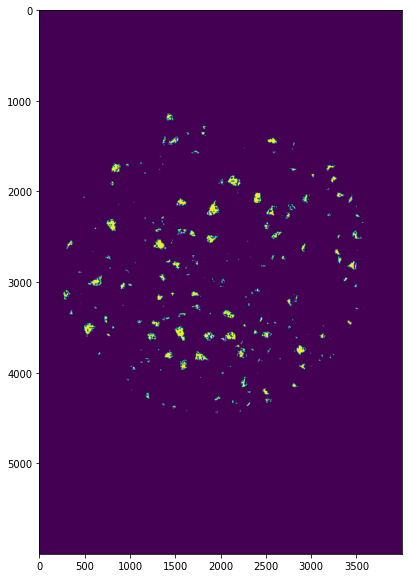

In [228]:
median_img = cv2.medianBlur(eroded_img,5)
display_img(median_img)

In [31]:
from PIL import Image
im = Image.fromarray((mask * 255).astype(np.uint8))
cimg = np.array(mask)
gray = cv2.cvtColor(cimg, cv2.COLOR_BGR2GRAY)

error: OpenCV(4.5.3) c:\users\runneradmin\appdata\local\temp\pip-req-build-_xlv4eex\opencv\modules\imgproc\src\color.simd_helpers.hpp:92: error: (-2:Unspecified error) in function '__cdecl cv::impl::`anonymous-namespace'::CvtHelper<struct cv::impl::`anonymous namespace'::Set<3,4,-1>,struct cv::impl::A0xc6cf0b74::Set<1,-1,-1>,struct cv::impl::A0xc6cf0b74::Set<0,2,5>,2>::CvtHelper(const class cv::_InputArray &,const class cv::_OutputArray &,int)'
> Invalid number of channels in input image:
>     'VScn::contains(scn)'
> where
>     'scn' is 1


In [ ]:
# BGR Value: [[[ 19  69 139]]]
# HSV Value: [[[ 13 220 139]]]
# Lower Limit: (50, 100, 100)
# Upper Limit (70, 255, 255)

In [ ]:
#read the image
img = cv2.imread("C:\\Users\\g654674\\OneDrive - General Mills\\Work_OneDrive\\Fruit Pieces\\Chocolate pieces\\All Wonka Photos\\Tote1_Case1_B_04.jpg")
#convert the BGR image to HSV colour space
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

#set the bounds
lower = np.array([70,180,180])
upper = np.array([150,255,255])

#create a mask using the bounds set
mask = cv2.inRange(hsv, lower, upper)

#create an inverse of the mask
mask_inv = cv2.bitwise_not(mask)
#Filter only the red colour from the original image using the mask(foreground)
res = cv2.bitwise_and(img, img, mask=mask)

cv2.namedWindow("res", cv2.WINDOW_NORMAL)
cv2.imshow("res", res)
cv2.waitKey(0)